 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [398]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [399]:
#Reading whale returns
whale_path = Path("./Resources/whale_returns.csv") #tells python what the path to the csv is 
#print(whale_path) - check to see if the path is correct
whale_data = pd.read_csv(whale_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. If these are not taken you will get a different answer with dtypes.
#print(whale_data) - check to see if the data is correct
whale_data.sort_index(ascending=True, inplace=True) #sorts the dataframe by the index
whale_data.head


<bound method NDFrame.head of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN     

In [400]:
#count nulls
whale_data.isnull().mean()*100 #identify the nulls, then count the percentage of nulls 

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [401]:
# Drop nulls
whale_data = whale_data.dropna() #drop the nulls
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [402]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")#tells python what the path to the csv is 
algo_data = pd.read_csv(algo_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. 
algo_data.sort_index(ascending=True, inplace=True)
algo_data.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [403]:
# Count nulls
algo_data.isnull().mean()*100 #identify the nulls, then count the percentage of nulls

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [404]:
# Drop nulls
algo_data = algo_data.dropna() #drop the nulls
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [405]:
# Reading S&P 500 Closing Prices
sp_path = Path("./Resources/sp500_history.csv")#tells python what the path to the csv is 
sp_data = pd.read_csv(sp_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. 
sp_data.sort_index(ascending=True, inplace=True)
sp_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [406]:
# Check Data Types
sp_data.dtypes

Close    object
dtype: object

In [407]:
# Fix Data Types
sp_data['Close'] = sp_data['Close'].astype('str') #convert the data type of 'Close' to 'str'

sp_data['Close']=pd.to_numeric(sp_data['Close'].str.replace('$','')) #convert the data type of 'Close' to 'str' and replace the dollar sign with nothing
print(sp_data['Close'])


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64


In [408]:
# Calculate Daily Returns
sp_data = sp_data.pct_change() #calculates the percentage change of the closing price or the "daily return"
sp_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [409]:
# Drop nulls
sp_data = sp_data.dropna() #drop rows with nulls
sp_data.isnull().sum() #check for nulls
sp_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [410]:
# Rename `Close` Column to be specific to this portfolio.
sp_data.columns
sp_data.columns = ['SP500_Daily_Returns'] #rename the column to be specific to this portfolio
sp_data.head()

,SP500_Daily_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [411]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([whale_data, algo_data, sp_data], axis = 'columns', join = 'inner') #initiates joined_data as a concatenation of the three dataframes. axis = 'columns' tells python to concatenate the columns. join = 'inner' tells python to only include the rows that are common between the three dataframes.
joined_data = joined_data.dropna() #drops any rows that have nulls
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Returns'}, xlabel='Date', ylabel='Returns'>

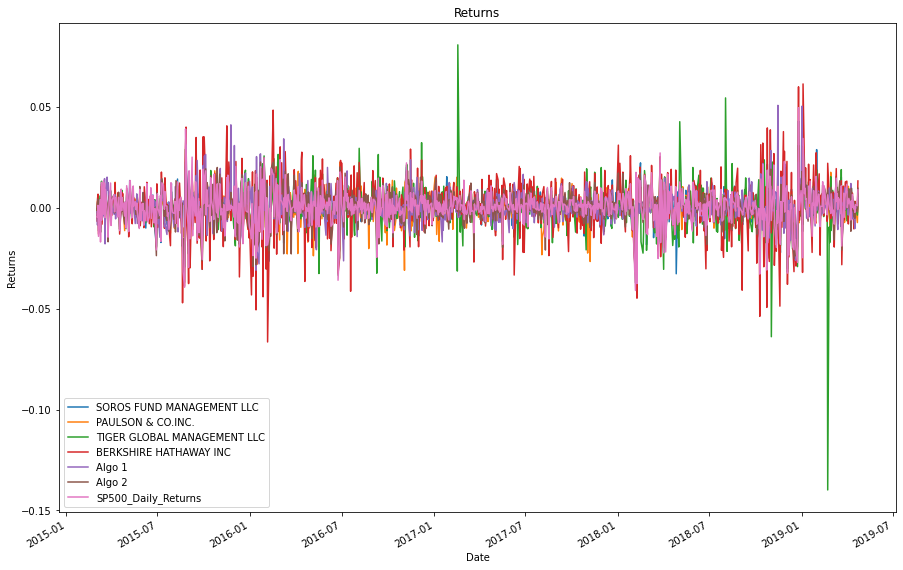

In [412]:
# Plot daily returns of all portfolios
joined_data.plot(figsize = (15,10), title = 'Returns', ylabel = 'Returns', xlabel = 'Date') #plots the dataframe with the given parameters

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date', ylabel='Returns'>

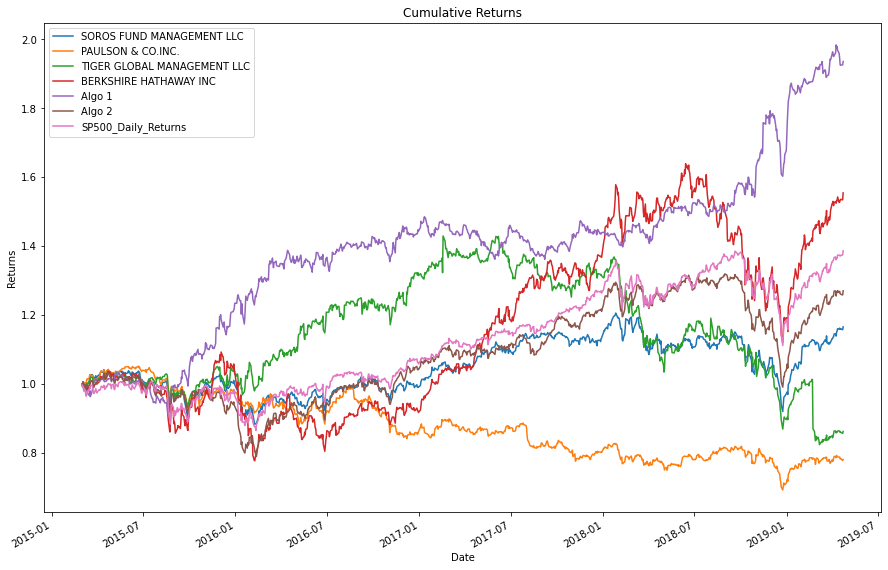

In [413]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (15,10), title = 'Cumulative Returns', ylabel = 'Returns', xlabel = 'Date') #plots the cumulative returns

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk Box Plot'}, ylabel='Risk'>

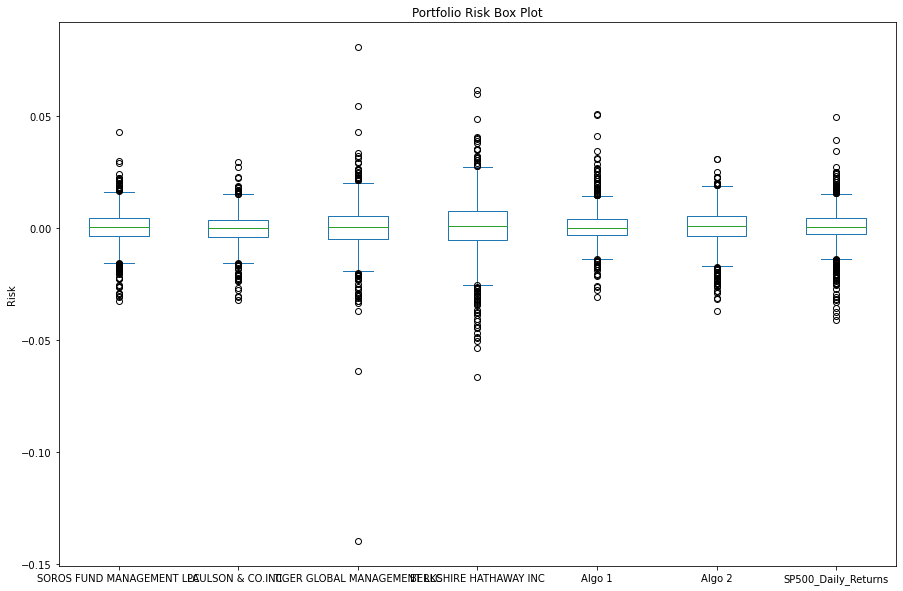

In [414]:
# Box plot to visually show risk
joined_data.plot(kind = 'box', figsize = (15,10), title = 'Portfolio Risk Box Plot',ylabel = 'Risk', xlabel = 'Portfolio') #kind = 'box' tells python to plot a box plot of the data. figsize = (15,10) tells python to set the size of the plot. title = 'Portfolio Risk Box Plot' tells python to name the plot. ylabel = 'Risk' tells python to name the y-axis. xlabel = 'Portfolio' tells python to name the x-axis.


### Calculate Standard Deviations

In [415]:
# Calculate the daily standard deviations of all portfolios
joined_data.std() #calculates the standard deviation of each column

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500_Daily_Returns            0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [416]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
sp_data = joined_data['SP500_Daily_Returns'].std() #overrides sp_data with the std of the column of daily returns of the S&P 500 in the joined dataframe 
joined_data.std() < sp_data #returns a boolean series telling which portfolios have lower std than the S&P 500. higher std means higher risk means higher risk.
#lower std means lower risk

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                          True
SP500_Daily_Returns            False
dtype: bool

### Calculate the Annualized Standard Deviation

In [417]:
# Calculate the annualized standard deviation (252 trading days)
joined_data.std()*np.sqrt(252) #calculates the annualized std of the daily returns of all portfolios

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500_Daily_Returns            0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date', ylabel='Risk'>

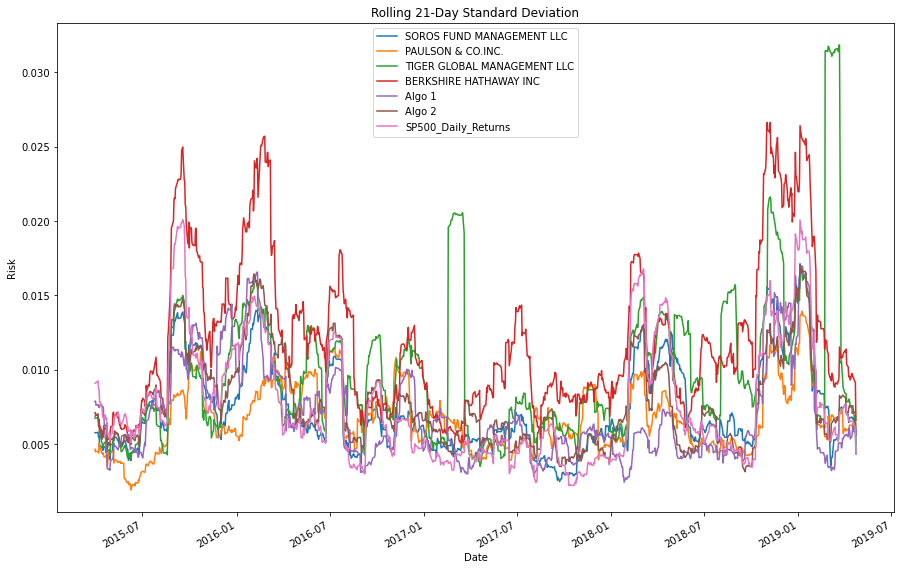

In [418]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_data.rolling(window = 21).std().plot(figsize = (15,10), title = 'Rolling 21-Day Standard Deviation', ylabel = 'Risk', xlabel = 'Date') #initiate joined_data df and use rolling function to calculate the rolling standard deviation of the dataframe with a 21 day window and standard deviation of the dataframe before being plotted
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [419]:
# Calculate the correlation
correlation = joined_data.corr() #calculates the correlation of the dataframe
# Display de correlation matrix
correlation.style.background_gradient(cmap='coolwarm') #plots the correlation matrix in a heatmap

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Daily_Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

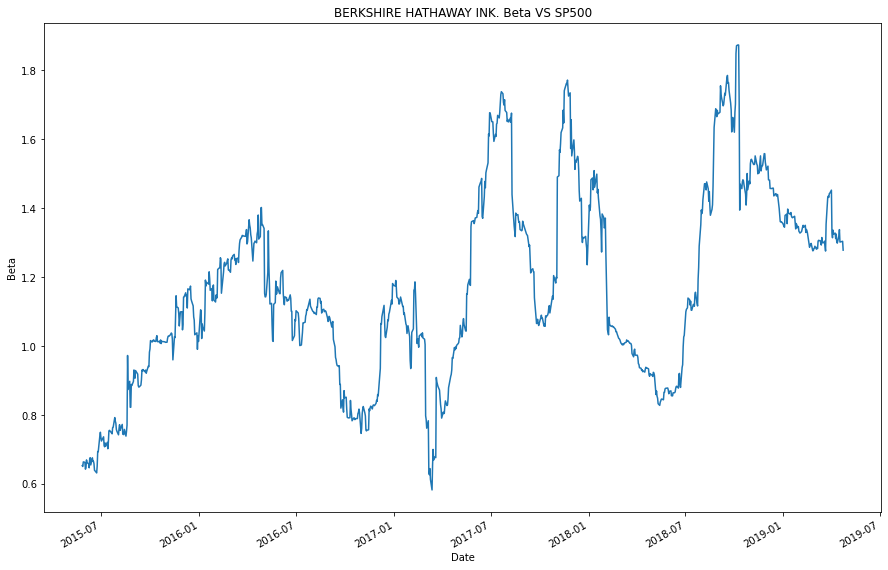

In [420]:
# Calculate covariance of a single portfolio
covariance = joined_data['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(joined_data['SP500_Daily_Returns']) #initiate joined_data df and use rolling function to calculate the rolling covariance of the dataframe with a 60 day window and covariance of the dataframe before being plotted
# Calculate variance of S&P 500
variance = joined_data['SP500_Daily_Returns'].rolling(window = 60).var() #calculates the variance of the daily returns of the S&P 500
# Computing beta
beta = (covariance/variance).plot(figsize = (15,10), title = 'BERKSHIRE HATHAWAY INK. Beta VS SP500', ylabel = 'Beta', xlabel = 'Date') #initiate joined_data df and use rolling function to calculate the rolling standard deviation of the dataframe with a 21 day window and standard deviation of the dataframe before being plotted
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Weighted Rolling 21-Day Standard Deviation'}, xlabel='Date', ylabel='Risk'>

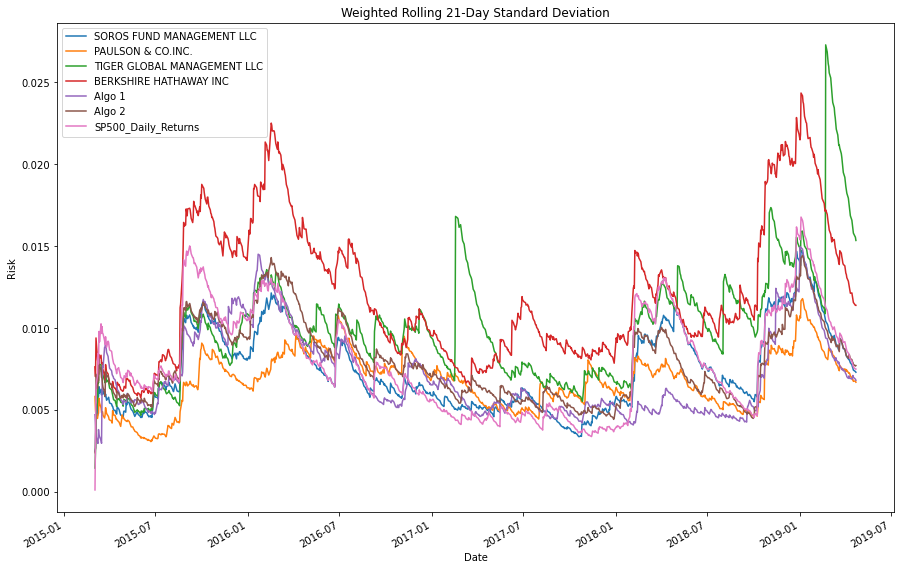

In [421]:
# Use `ewm` to calculate the rolling window
joined_data.ewm(halflife=21).std().plot(figsize = (15,10), title = 'Weighted Rolling 21-Day Standard Deviation', ylabel = 'Risk', xlabel = 'Date') #initiate joined_data df and use ewm function to calculate the rolling standard deviation of the dataframe with a 21 day window and standard deviation of the dataframe before being plotted

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [422]:
# Annualized Sharpe Ratios
sharp_ratio = (joined_data.mean()/joined_data.std()*np.sqrt(252)) #calculate the annualized sharpe ratio
print(sharp_ratio)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500_Daily_Returns            0.648267
dtype: float64


<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}, xlabel='Portfolio', ylabel='Sharpe Ratio'>

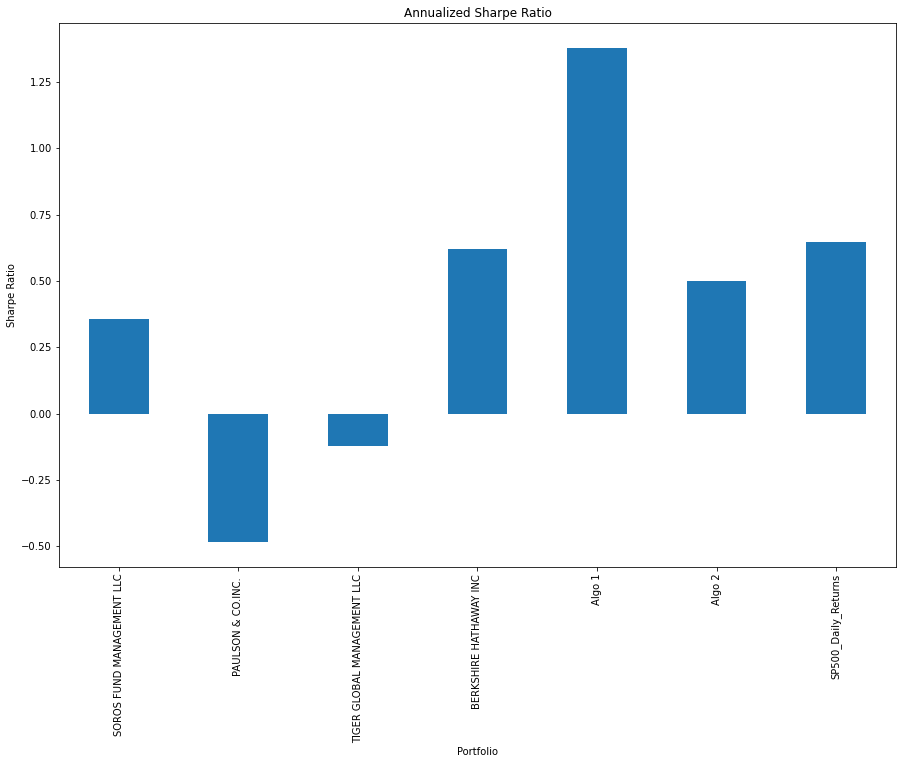

In [423]:
# Visualize the sharpe ratios as a bar plot
sharp_ratio.plot(figsize = (15,10), kind = 'bar', title = 'Annualized Sharpe Ratio', ylabel = 'Sharpe Ratio', xlabel = 'Portfolio') #initiate sharp_ratio df and use plot function to plot the dataframe as a bar plot

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [424]:
# Reading data from 1st stock
asml_path = Path("./Resources/ASML1.csv")#tells python what the path to the csv is 
asml_data = pd.read_csv(asml_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. 
asml_data.sort_index(ascending=True, inplace=True) #sort the dataframe by the index
asml_data.columns = ['ASML_Daily_Returns'] #rename the column to be specific to this portfolio
asml_data.index = asml_data.index.strftime('%Y-%m-%d') #converts the index to a string format
asml_data.head()

,ASML_Daily_Returns
Date,
2013-01-02,66.78
2013-01-03,65.38
2013-01-04,64.71
2013-01-07,63.66
2013-01-08,63.14


In [425]:
# Reading data from 2nd stock
crsp_path = Path("./Resources/CRSP1.csv")#tells python what the path to the csv is 
crsp_data = pd.read_csv(crsp_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. 
crsp_data.sort_index(ascending=True, inplace=True) #sort the index in ascending order
crsp_data.columns = ['CRISPR_Daily_Returns'] #rename the column to be specific to this portfolio
crsp_data.index = crsp_data.index.strftime('%Y-%m-%d') #converts the index to a string
crsp_data.head()

,CRISPR_Daily_Returns
Date,
2016-10-19,14.09
2016-10-20,13.94
2016-10-21,13.82
2016-10-24,14.01
2016-10-25,14.41


In [426]:
# Reading data from 3rd stock
tsla_path = Path("./Resources/TSLA1.csv")#tells python what the path to the csv is 
tsla_data = pd.read_csv(tsla_path, index_col= 'Date', infer_datetime_format = True, parse_dates = True) #index_col tells python to use the column headed by 'Date' as the index. #infer_datetime_format = True tells python to infer the date and time from the given format of dates. 
tsla_data.sort_index(ascending=True, inplace=True) #sorts the index in ascending order
tsla_data.columns = ['TSLA_Daily_Returns'] #renames the column
tsla_data.index = tsla_data.index.strftime('%Y-%m-%d') #changes the index to a string
tsla_data.head()

,TSLA_Daily_Returns
Date,
2013-01-02,7.07
2013-01-03,6.95
2013-01-04,6.88
2013-01-07,6.87
2013-01-08,6.74


In [427]:
#NOTE TO GRADER: Different method used due to issues encountered. 
#I was unable to concatonate the data from the Google Fiance csv files from the 3 stocks that I selected, with the data from the original combined dataframe due to some formatting issue that I was unable to resolve in time to finish this homework. 
#I was able to concatonate my 3 stocks together and the original combined dataframe and print them separately, however when I concatonate the two joined dfs, and drop nulls, all values became nulls and I was unable to do any further analysis.
#There were two helpers on AskBCS Learning Assist that were unable to figure out the precise issue that I was having, so it was suggested to use yfinance. I was able to use the data imoprted from yfinance to complete the assignment.

import yfinance as yf
tsla = yf.Ticker("TSLA")
tsla_hist = tsla.history(period="max") #period = max tells python to use the most recent data available
tsla_hist = tsla_hist.drop(columns=['Open', 'High', 'Low', 'Volume','Dividends','Stock Splits'], axis = 1) #axis = 1 tells python to drop the columns of the dataframe
tsla_hist.head()

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840
2010-07-06,3.222


In [428]:
asml = yf.Ticker("ASML")
asml_hist = asml.history(period="max") #period = max is used to get the most recent data
asml_hist = asml_hist.drop(columns=['Open', 'High', 'Low', 'Volume','Dividends','Stock Splits'], axis = 1) #drop columns that are not needed
asml_hist.head()

,Close
Date,
1995-03-15,1.291646
1995-03-16,1.420810
1995-03-17,1.370579
1995-03-20,1.363404
1995-03-21,1.427985


In [429]:
crsp = yf.Ticker("CRSP") 
crsp_hist = crsp.history(period="max") #period is the number of days you want to pull data from
crsp_hist = crsp_hist.drop(columns=['Open', 'High', 'Low', 'Volume','Dividends','Stock Splits'], axis = 1) #drop columns that are not needed
crsp_hist.head()


,Close
Date,
2016-10-19,14.09
2016-10-20,13.94
2016-10-21,13.82
2016-10-24,14.01
2016-10-25,14.41


In [430]:
# Combine all stocks in a single DataFrame

joined_personal_data = pd.concat([asml_hist, crsp_hist, tsla_hist], axis = 'columns', join = 'inner') #concatenate the 3 stocks into a single dataframe
joined_personal_data = joined_personal_data.dropna() #drop all null values
joined_personal_data.head()

,Close,Close,Close
Date,,,
2016-10-19,99.151604,14.09,40.712002
2016-10-20,98.665794,13.94,39.820000
2016-10-21,100.266098,13.82,40.018002
2016-10-24,100.285149,14.01,40.551998
2016-10-25,99.580254,14.41,40.467999


In [431]:
# Reset Date index
joined_personal_data.sort_index(inplace=True) #inplace=True tells python to sort the dataframe in place, rather than creating a new dataframe.


In [432]:
# Reorganize portfolio data by having a column per symbol
column = ['ASML', 'CRSP', 'TSLA'] #column names
joined_personal_data.columns = column #rename columns
joined_personal_data = joined_personal_data.dropna() #drop nulls
joined_personal_data.head()

,ASML,CRSP,TSLA
Date,,,
2016-10-19,99.151604,14.09,40.712002
2016-10-20,98.665794,13.94,39.820000
2016-10-21,100.266098,13.82,40.018002
2016-10-24,100.285149,14.01,40.551998
2016-10-25,99.580254,14.41,40.467999


In [433]:
# Calculate daily returns
# Drop NAs
joined_daily_returns = joined_personal_data.pct_change().dropna() #pct_change() calculates the percentage change of each value in the dataframe.
# Display sample data
joined_daily_returns.head() #head() displays the first 5 rows of the dataframe.

,ASML,CRSP,TSLA
Date,,,
2016-10-20,-0.004900,-0.010646,-0.021910
2016-10-21,0.016219,-0.008608,0.004972
2016-10-24,0.000190,0.013748,0.013344
2016-10-25,-0.007029,0.028551,-0.002071
2016-10-26,-0.006600,0.027065,-0.000494


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [434]:
# Set weights
weights = [1/3, 1/3, 1/3] #weights for each stock
# Calculate portfolio return
portfolio_returns = joined_daily_returns.dot(weights) #dot product of weights and daily returns
# Display sample data
portfolio_returns.head() #portfolio returns

Date
2016-10-20   -0.012485
2016-10-21    0.004195
2016-10-24    0.009094
2016-10-25    0.006484
2016-10-26    0.006657
dtype: float64

In [435]:
joined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [436]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolio = pd.concat([joined_data, joined_daily_returns], axis = 'columns', join = 'inner') #overwrites the original dataframe with concatonated dataframe made of my portfolio and the original combined portfolio. The axis of the concat is columns or 1. The join is inner or 0.
new_portfolio


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,ASML,CRSP,TSLA
Date,,,,,,,,,,
2016-10-20,-0.004313,0.005428,-0.002777,-0.000892,-0.000235,-0.000638,-0.001376,-0.004900,-0.010646,-0.021910
2016-10-21,0.000168,-0.005110,-0.002161,0.000765,-0.000477,-0.000884,-0.000084,0.016219,-0.008608,0.004972
2016-10-24,0.002757,-0.000395,0.007967,0.001300,-0.002835,0.002744,0.004750,0.000190,0.013748,0.013344
2016-10-25,-0.004851,0.004397,-0.005981,-0.005773,-0.008515,-0.005852,-0.003798,-0.007029,0.028551,-0.002071
2016-10-26,-0.004346,-0.006362,-0.004195,-0.009913,-0.002585,-0.006861,-0.001740,-0.006600,0.027065,-0.000494
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.018915,0.051952,0.026203
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.001277,-0.067810,-0.007792
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.012539,-0.004667,0.007484


In [437]:
new_portfolio.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500_Daily_Returns', 'ASML', 'CRSP', 'TSLA'],
      dtype='object')

In [438]:
joined_daily_returns.index.dtype

dtype('<M8[ns]')

In [439]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio = new_portfolio.dropna() #drops all the NaNs
new_portfolio.isnull().sum()*100 #check if there are any NaNs

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Daily_Returns            0
ASML                           0
CRSP                           0
TSLA                           0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [440]:
# Calculate the annualized `std`
new_portfolio.std()*np.sqrt(252) #initialize new_portfolio and calcualte standard deviation multiplied by the square root of 252

SOROS FUND MANAGEMENT LLC      0.122677
PAULSON & CO.INC.              0.109023
TIGER GLOBAL MANAGEMENT LLC    0.186425
BERKSHIRE HATHAWAY INC         0.195575
Algo 1                         0.107581
Algo 2                         0.119675
SP500_Daily_Returns            0.126325
ASML                           0.288478
CRSP                           0.717324
TSLA                           0.472759
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

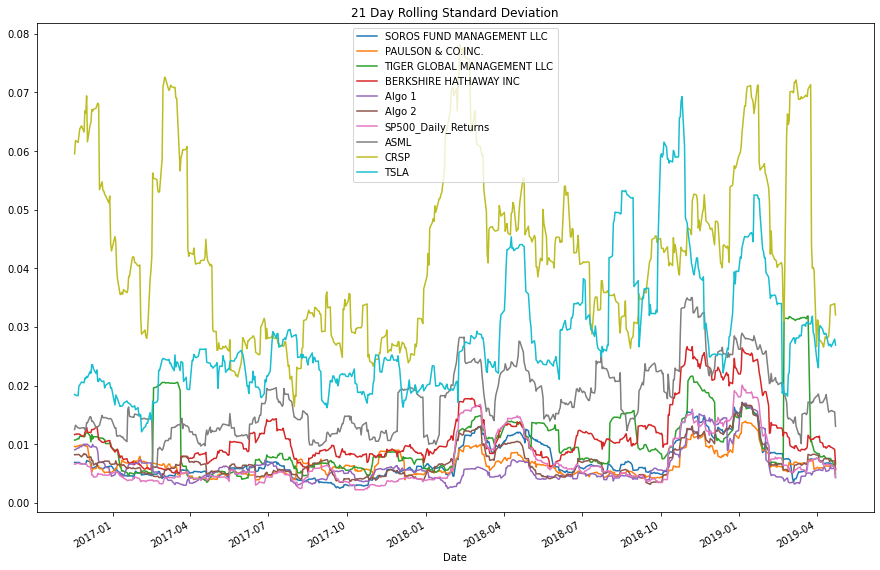

In [441]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
new_portfolio.rolling(window=21).std().plot(figsize=(15,10), title='21 Day Rolling Standard Deviation') #initiate new_portfolio, then rolling window of size 21 days, then calculate standard deviation and plot it with a figure of size 15x10 and a title of '21 Day Rolling Standard Deviation'

### Calculate and plot the correlation

In [442]:
# Calculate and plot the correlation
correlation = new_portfolio.corr() #calculate correlation
correlation.style.background_gradient(cmap='coolwarm') #style the correlation with a background gradient of coolwarm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns,ASML,CRSP,TSLA
SOROS FUND MANAGEMENT LLC,1.000000,0.659148,0.482867,0.760842,0.279089,0.786989,0.809239,0.568345,0.328065,0.320322
PAULSON & CO.INC.,0.659148,1.000000,0.386992,0.529202,0.271402,0.690742,0.667313,0.449127,0.264865,0.219293
TIGER GLOBAL MANAGEMENT LLC,0.482867,0.386992,1.000000,0.355380,0.112108,0.420815,0.529329,0.302845,0.121914,0.197874
BERKSHIRE HATHAWAY INC,0.760842,0.529202,0.355380,1.000000,0.253544,0.713769,0.789025,0.622429,0.379431,0.377059
Algo 1,0.279089,0.271402,0.112108,0.253544,1.000000,0.279895,0.253448,0.157070,0.237246,0.080201
Algo 2,0.786989,0.690742,0.420815,0.713769,0.279895,1.000000,0.857146,0.565305,0.402126,0.301019
SP500_Daily_Returns,0.809239,0.667313,0.529329,0.789025,0.253448,0.857146,1.000000,0.646124,0.324227,0.350570
ASML,0.568345,0.449127,0.302845,0.622429,0.157070,0.565305,0.646124,1.000000,0.248676,0.272389
CRSP,0.328065,0.264865,0.121914,0.379431,0.237246,0.402126,0.324227,0.248676,1.000000,0.136773
TSLA,0.320322,0.219293,0.197874,0.377059,0.080201,0.301019,0.350570,0.272389,0.136773,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Personal Portfolio Beta Vs S&P 500 Beta'}, xlabel='Date'>

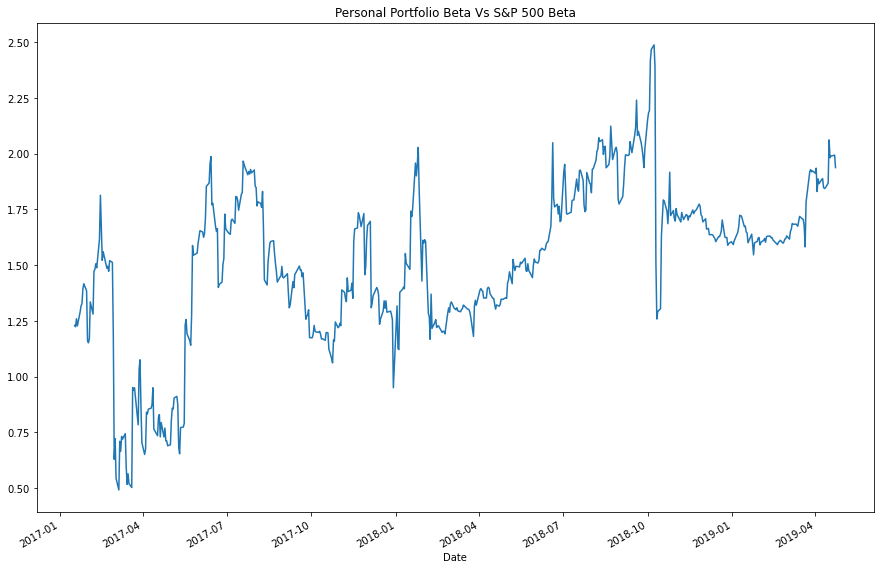

In [443]:
# Calculate and plot Beta
covariance = portfolio_returns.rolling(window=60).cov(new_portfolio['SP500_Daily_Returns']) #calculate covariance of the portfolio returns and the SP500 returns
variance = new_portfolio['SP500_Daily_Returns'].rolling(60).var() #calculate variance of the SP500 returns
beta = (covariance/variance) #calculate beta
beta.plot(figsize=(15,10), title='Personal Portfolio Beta Vs S&P 500 Beta') #plot the beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [444]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (new_portfolio.mean() * 252) / (new_portfolio.std() * np.sqrt(252)) #initialize new_portfolio, then calculate the mean multiplied by 252, then divide by the standard deviation multiplied by the square root of 252
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.600427
PAULSON & CO.INC.             -0.526451
TIGER GLOBAL MANAGEMENT LLC   -0.661589
BERKSHIRE HATHAWAY INC         1.150313
Algo 1                         1.219600
Algo 2                         0.902318
SP500_Daily_Returns            1.057555
ASML                           1.113668
CRSP                           0.916748
TSLA                           0.454710
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratio'}>

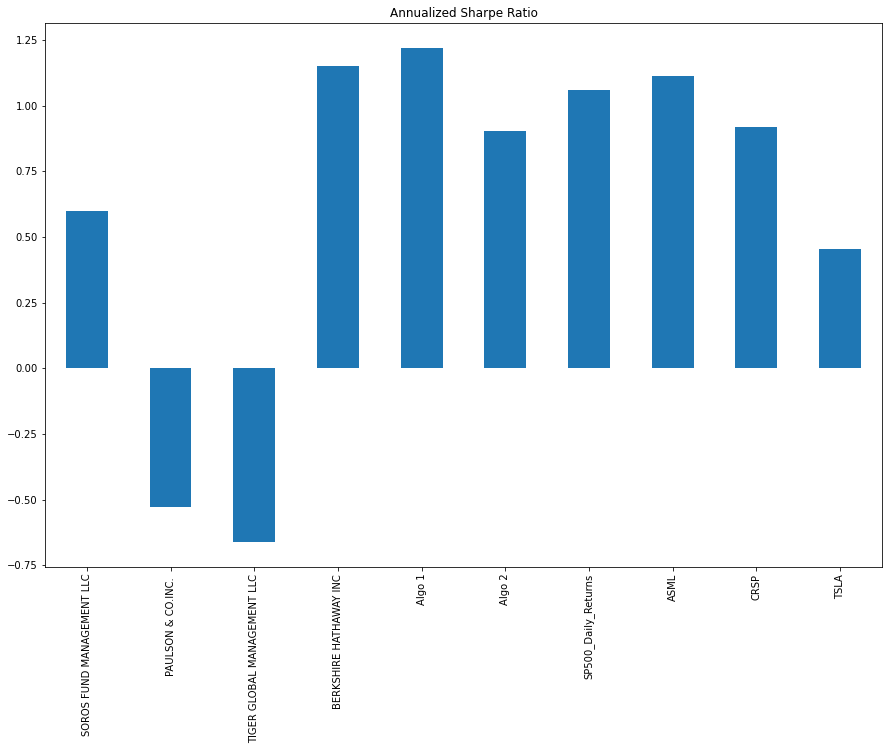

In [445]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', figsize=(15,10), title='Annualized Sharpe Ratio') #initiate sharpe_ratio, then plot it as a bar plot with a figure of size 15x10 and a title of 'Annualized Sharpe Ratio'

### How does your portfolio do?

Write your answer here!

In [447]:
a=sharpe_ratio['TSLA']
b=sharpe_ratio['CRSP']
c=sharpe_ratio['ASML']
average_sharpe_ratio = (a+b+c)/3
average_sharpe_ratio
print(f"In terms of this metric, my portfolio's average Sharpe Ratio is {average_sharpe_ratio}, and comes in 4th behind Algo 2. ")

In terms of this metric, my portfolio's average Sharpe Ratio is 0.8283751661486481, and comes in 4th behind Algo 2. 
